<bound method LinearReg.datacrossval of <__main__.LinearReg object at 0x7f5c6cceb590>>
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  8 non-null      float64
 1   Sepal_width   8 non-null      float64
 2   Petal_length  8 non-null      float64
 3   Petal_width   8 non-null      float64
 4   Species_cat   8 non-null      float64
dtypes: float64(5)
memory usage: 384.0+ bytes
None


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


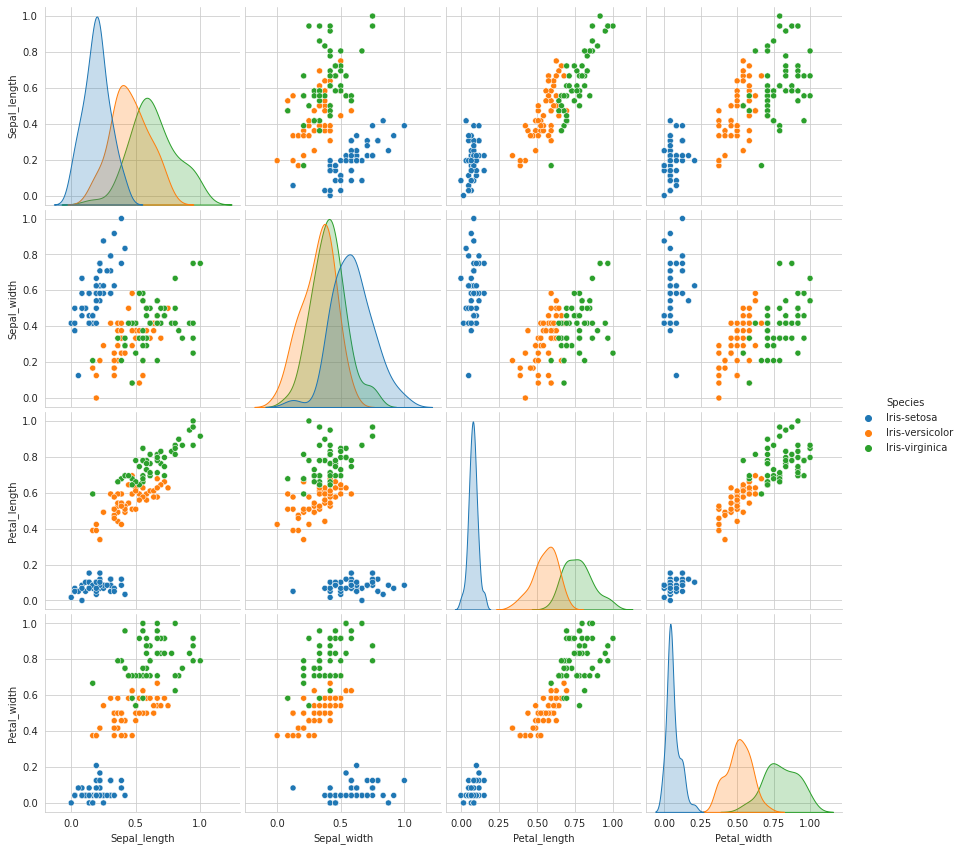

    Values for Beta are [[-1.6340657818113702 0.024553360465899288 3.2181377066356394
  0.3348527962805896]
 [0.27732004205383787 -0.38010157835923847 0.8067198735285787
  1.5078581739621235]
 [0.052332488710205016 -0.3138282438163908 2.023454930269722
  0.24610843631209967]
 [-1.4931786999517132 0.04058172614745828 1.6169021139366837
  1.9882757187229292]
 [0.20176394058299096 -0.32085662062636666 1.9959150942726955
  0.2429986060790289]
 [-0.910582307801447 -0.33476765542353626 0.5375201353309679
  2.5096753041003046]]
    Beta mean values [-0.5844017197029161 -0.21406983526869575 1.6997749756623814
 1.1382948392428458]
    Accuracy for the dataset:
98.0%


In [10]:
import pandas as pd

import numpy as np

import seaborn as sns

from sklearn import metrics


import matplotlib.pyplot as plt

class LinearReg:

    
    def __init__(self):
        


        self.irisdata = pd.read_csv("iris.data", sep=",", header=None)

        self.irisdata.columns = ["Sepal_length", 
                             "Sepal_width", 
                             "Petal_length", 
                             "Petal_width", 
                             "Species"]
        self.altered_data()


        self.irisdata["Species"] = self.irisdata["Species"].astype('category')


        self.irisdata["Species_cat"] = self.irisdata["Species"].cat.codes 

        

        self.Betalist   =   np.array( [])
    
    def alterdata(  self, irisdata):
      return irisdata.copy()

    def maximumval(self,irisdata,feature):
      return irisdata[feature].max() 



    def minimumval(self,irisdata,feature):
      return irisdata[feature].min()



    def irisdata_modified(self,feature,minimumval,maximumval):
      return (self.irisdata[feature] - minimumval)/(maximumval - minimumval)



         
    def altered_data(self):
        
        irisdata_modified =  self.alterdata(self.irisdata)

        for feature in   self.irisdata.columns:

            if feature.lower() not in ('species','species_cat'):

                maximumval   = self.maximumval(  self.irisdata,feature)


                minimumval   = self.minimumval(   self.irisdata,feature)

                irisdata_modified[feature] = self.irisdata_modified(feature,minimumval,maximumval)

        self.irisdata = irisdata_modified

    def datacrossval(self):
      return pd.crosstab( index  =   self.irisdata["Species"], columns = "count")
    
    def irisdata_description(self):
        
        datacrossval = self.datacrossval

        print(datacrossval)

        print(  self.irisdata.describe().info())

        
    
    def irisdata_visualization(self):
        
        irisdata = self.irisdata.copy()

        irisdata = irisdata.drop(   columns = ["Species_cat"])

        sns.set_style("whitegrid")

        sns.pairplot(    irisdata, hue="Species", size=3)

        plt.show()
    
    def Betaval( self,n_features,n_records):
      return np.matmul(  np.matmul (np.linalg.inv(  np.matmul (n_features.transpose(),    n_features)),   n_features.transpose()),   n_records)

    def fit(self, features_train, records_train):
        
        n_features =   features_train.to_numpy()

        n_records = records_train.to_numpy()

        Betaval = self.Betaval(   n_features,   n_records)

        return Betaval

    def feature_shape(self,n_features,Betaval):
      if n_features.shape[1] == 1:    
           return  np.matmul(   n_features.transpose(),   Betaval)
      else:
           return  np.matmul(   n_features,   Betaval)
           
      
    def predict(self, test_featuresdata, Betaval):

        
        n_features   =   test_featuresdata.to_numpy()


        n_records  =   self.feature_shape(n_features,Betaval)  


        n_records  = n_records.astype(np.float64)

        n_records  =    np.positive(n_records)

        n_records    =     np.int32(np.rint(n_records, casting='unsafe'))

        return n_records

    def trainingbin(self,    traintest_percentsplit, no_of_species):
      return int(  no_of_species * (1 - traintest_percentsplit))
    
    def testingbin(self,    traintest_percentsplit, no_of_species):
      return int(   no_of_species * traintest_percentsplit)

    def trainingdata(self,   irisdf,    trainingbin):
      return irisdf.iloc[:trainingbin, :]
    
    def testingdata(self,   irisdf,    testingbin):
      return irisdf.iloc[-testingbin:, :]
    
    def iris_split(self,   irisdf,   traintest_percentsplit,    no_of_species):
       
        trainingbin = self.trainingbin(   traintest_percentsplit,   no_of_species)

        testingbin = self.testingbin(  traintest_percentsplit,   no_of_species)

        iris_train_data   =   self.trainingdata(   irisdf, trainingbin)

        iris_test_data   = self.testingdata(   irisdf, testingbin)
        
        return iris_train_data, iris_test_data

    def irislabel(  self,   irisdata):
      return irisdata.Species.unique().to_list()

    def lenoflabel(  self,  irislabel):
      return len(irislabel)

    def no_of_tuples(   self,   irisdata):
      return irisdata.shape[0]

    def iris_traineddata(   self,   no_of_tuples,   traintest_percentsplit):
      return int(no_of_tuples*(1 - traintest_percentsplit))

    def irist_testdata(self,    no_of_tuples,    traintest_percentsplit):
      return int(   no_of_tuples*traintest_percentsplit)

    def fold_data(self,   no_of_tuples,   fold):
      return int(no_of_tuples/fold)

    def no_of_species(self,fold_data,no_of_irislabel):
      return int(fold_data/no_of_irislabel)
    
    def irislabel_split(self,irisdata,k):
      return irisdata[irisdata["Species"] == k]

    def irislabeldf(self,irislabel_split,k):
      return irislabel_split[k]

    def iristrain_new_df(self, kfold_bin,x):
      return kfold_bin[x]["train"]

    def iristest_new_df(self,kfold_bin,x):
      return kfold_bin[x]["test"]

    def aval(self,x,no_of_species):
     return x*no_of_species

    def bval(self,x,no_of_species):
      return x*no_of_species+no_of_species

    def features_train(self,iris_df_data):
      return iris_df_data.iloc[:,:4]

    def records_train(self,iris_df_data):
      return iris_df_data.iloc[:,-1:]

    def test_featuresdata(  self,iris_df_data_test):
      return iris_df_data_test.iloc[:, :4]

    def testrecordsperfeature(self,iris_df_data_test):
      return iris_df_data_test.iloc[:,-1]

    
    def accuracyval(self,x,testrecordsperfeature,n_records):
     return metrics.accuracy_score(y_true = testrecordsperfeature, y_pred=n_records)
            
    def Bvalue(self,Betaval):
        return np.append(self.Betalist, Betaval)
                
    def Betavalueshape(self):
        return np.reshape(self.Betalist, (fold, 4))

    def Betameanvalue(self):
      return np.mean(self.Betalist, axis=0)

    def irisdf_new (self):
      return pd.DataFrame(columns=self.irisdata.columns)

    def irisdict_new(self,irisdf_new):
      return {"train": irisdf_new, "test": irisdf_new}
            

    def iris_cross_val(self, traintest_percentsplit=0.2, fold=5):
        
        
        irislabel = self.irislabel(self.irisdata)
        no_of_irislabel = self.lenoflabel(irislabel)
        
        
        no_of_tuples = self.no_of_tuples(self.irisdata)

        iris_traineddata = self.iris_traineddata(no_of_tuples,traintest_percentsplit)

        irist_testdata = self.irist_testdata(no_of_tuples,traintest_percentsplit)

        fold_data = self.fold_data(no_of_tuples,fold)

        no_of_species = self.no_of_species(fold_data,no_of_irislabel)
        
        
        irislabel_split = {}
        
        
        kfold_bin = {}
        
        
        for x in range(0, fold):
            irisdf_new = self.irisdf_new()

            irisdict_new = self.irisdict_new(   irisdf_new)
            kfold_bin[x] = irisdict_new
        
        
        for k in irislabel:
            irislabel_split[k]   =    self.irislabel_split(self.irisdata,k)
        
        for k in irislabel:
            irislabeldf   =   self.irislabeldf(irislabel_split,k)
            
            for x in range(0, fold):

                iristrain_new_df =     self.iristrain_new_df(kfold_bin,x)
                iristest_new_df =    self.iristest_new_df(kfold_bin,x)
                
                
                i =    self.aval(x,no_of_species)
                j =     self.bval(x,no_of_species)

                trainirisdf, testirisdf =     self.iris_split(irislabeldf.iloc[i:j, :],traintest_percentsplit, no_of_species)

                frames   =    [trainirisdf, iristrain_new_df]
                
                iristrain_new_df   =    pd.concat(frames, ignore_index=True)



                kfold_bin[x]["train"] = iristrain_new_df


                frames = [testirisdf, iristest_new_df]


                iristest_new_df = pd.concat(frames, ignore_index=True)

                kfold_bin[x]["test"] = iristest_new_df

                x += 1
        
        
        consolidated_result = 0
        
        iris_y_predicted = {}
          

        
        self.iris_accuracy = {}
        
        for x in range(0, fold):
            iris_df_data     =   self.iristrain_new_df(kfold_bin,x)

            features_train     =  self.features_train(iris_df_data)


            records_train    =  self.records_train(iris_df_data)

            iris_df_data_test    =    self.iristest_new_df(kfold_bin,x)

            test_featuresdata    =    self.test_featuresdata(iris_df_data_test)

            testrecordsperfeature    =   self.testrecordsperfeature(iris_df_data_test)

            Betaval =    self.fit(features_train, records_train)

            n_records    =   self.predict(test_featuresdata, Betaval).tolist()


            testrecordsperfeature    =   testrecordsperfeature.to_list()

            iris_y_predicted[x] =    n_records
            
            self.iris_accuracy[x]   =      self.accuracyval(x,testrecordsperfeature,n_records)

            self.Betalist   =   self.Bvalue(Betaval)

            x += 1
        

        
        self.Betalist    =    self.Betavalueshape()

        print("    Values for Beta are", self.Betalist )
        
        
        self.B_mean    =    self.Betameanvalue()


        print("    Beta mean values", self.B_mean)
       

    def test_fit( self):
        
        n_features =     self.irisdata.iloc[:,   : 4].to_numpy()



        n_records    = self.irisdata.iloc[:,    -1].to_numpy()
        
        Betaval   =    self.Betaval(  n_features,   n_records)

        print(   Betaval)
        return Betaval
    
    

    def actualYval(   self,    irisdata):
      return self.irisdata.iloc[:, -1].to_numpy()
    
    
    def Betamean_test(   self):
        
        n_features   = self.irisdata.iloc[:, :4]
        actual_Y =   self.actualYval(self.irisdata)
        Betaval    = self.B_mean
        
        iris_y_predicted =   self.predict(   n_features,   Betaval)

        print("    Accuracy for the dataset:"  )

        print(str(   metrics.accuracy_score(   y_true=actual_Y,   y_pred=iris_y_predicted   )*100)+"%")
        
if __name__   == "__main__":
    linreg    =       LinearReg()

    traintest_percentsplit     = 0.3  #Insert float value such as 20% test data = 0.2

    fold    =   6

    linreg.irisdata_description()

    linreg.irisdata_visualization()


    linreg.iris_cross_val(traintest_percentsplit,    fold)

    linreg.Betamean_test()